<center><font size='5'>Nash equilibrium</font></center>
<center><font size='3'>Eric Martin, CSE, UNSW</font></center>
<center><font size='3'>COMP9021 Principles of Programming</font></center>

In [34]:
# Does not need to be executed if
# ~/.ipython/profile_default/ipython_config.py
# exists and contains:
# c.InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [35]:
import zipfile
with zipfile.ZipFile('Illustrations.zip') as illustrations:
    illustrations.extractall('.')

In [36]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [37]:
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import re

# $2\times2$ games, pure strategies, and Pareto optimality

Consider two players, Ruth and Charlie, who both can take one of two possible decisions. Each of the four pairs $(d_R,d_C)$ of possible decisions taken by both players is associated with a pair $(p_R,p_C)$ of expected _payoffs_ (the indexes $R$ and $C$ refer to Ruth and Charlie, respectively).

For a first example, consider the _prisoner's dilemma_. Ruth and Charlie are imprisoned for serious charges, but evidence is missing to convict them for those. Ruth and Charlie, who are held in separate cells and cannot communicate, are each offered the following deal, knowing that the other is offered the same deal:

* if one of them confesses and the partner remains silent, then the one who confessed will go free while the confession will be used to sentence the other to 10 years in jail;
* if both confess, then they will both spend 8 years in jail;
* if neither confesses, then they will both spend 1 year in jail for the minor crime that can be proved without additional evidence.

<div><img src="Illustrations/table_1.pdf" width="350"/></div>

Both Ruth and Charlie deciding to confess is a _Nash equilibrium_:

* Charlie confessing, Ruth finds herself better off by confessing (-8) than by not confessing (-10); 
* Ruth confessing, Charlie finds himself better off by confessing (-8) than by not confessing (-10).

Note that Ruth and Charlie would in fact be better off if they did not confess (they would spend 1 year rather than 8 years in jail). But that is not what Game theory recommends, and that is not what is observed in practice either... A way to express that Ruth and Charlie would be better off if they did not testify is to say that this pair of decisions is not _Pareto optimal_: there exists another pair of decisions (namely, both of them not testifying) associated with an outcome which is at least as good for both players, and better for at least one of them (in this case, better for both of them).

For a second example, consider the _game of chicken_. Ruth and Charlie drive towards each other at high speed following a white line drawn on the middle of the road. If both swerve (chicken out), then it is a draw (0 to both). If one swerves and the other does not, then the one who did not chicken out wins (1) while the other one loses (-1). If neither chickens out, then they won't have a chance to play again, and their common payoff could be reasonably set to $-\infty$, but we set it arbitrarily to -10.

<div><img src="Illustrations/table_2.pdf" width="300"/></div>

Ruth not chickening out and Charlie chickening out is a Nash equilibrium:

* Charlie swerving, Ruth finds herself better off by not swerving (1) than by swerving (0); 
* Ruth not swerving, Charlie finds himself better off by swerving (-1) than by not swerving (-10).

By symmetry, Ruth chickening out and Charlie not chickening out is also a Nash equilibrium.

# Mixed strategies

Testifying or not testifying, swerving or not swerving, are _pure strategies_. More generally, Ruth can testify or swerve with probability $p$, and Charlie can testify or swerve with probability $q$. Ruth opts for a pure strategy iff $p$ is 0 or 1, and similarly Charlie opts for a pure strategy iff $q$ is 0 or 1; otherwise, they opt for a _mixed strategy_.

Let us consider the game of chicken with both Ruth and Charlie swerving with probability $0.9$. Then Ruth's expectation is $0.1(0.1\times -10+0.9\times 1)+0.9(0.1\times -1+0.9\times 0)=-0.1$; by symmetry, Charlie's expectation is also $-0.1$. It turns out that this strategy is also a Nash equilibrium, as we now show.

If Ruth swerves with probability $p$ and Charlie swerves with probability $q$, then Ruth's expectation is equal to

\begin{equation*}
(1-p)[(1-q)\times -10+q\times 1]+p[(1-q)\times -1+q\times 0]
\end{equation*}

which simplifies to

\begin{equation*}
(-10q+9)p+11q-10
\end{equation*}

Ruth's aim is to _maximise_ her expectation, that is, maximise the value of the above expression, which is achieved by:

* setting $p$ to 0 if $q>0.9$;
* setting $p$ to 1 if $q<0.9$;
* taking for $p$ an arbitrary value if $q=0.9$.

By symmetry, Charlie maximises his expectation by:

* setting $q$ to 0 if $p>0.9$;
* setting $q$ to 1 if $p<0.9$;
* taking for $q$ an arbitrary value if $p=0.9$.

This means that both players accepting the opponent's strategy as it is (they can only decide for themselves), Ruth and Charlie will both not regret their strategy in three cases, the three Nash equilibria:

* $p=0$ and $q=1$
* $p=1$ and $q=0$
* $p=0.9$ and $q=0.9$

<div><img src="Illustrations/chicken.pdf" width="400"/></div>

# No regret graphs

Use the following notation for Ruth's and Charlie's payoffs:

<div><img src="Illustrations/table_3.pdf" width="200"/></div>

Then Ruth's expectation is

\begin{equation*}
(1-p)[(1-q)a_1+qa_2]+p[(1-q)a_3+qa_4]
\end{equation*}

which can be written as

\begin{equation*}
(a_1-a_2-a_3+a_4)pq+(a_3-a_1)p+(a_2-a_1)q+a_1
\end{equation*}

whereas Charlie's expectation is

\begin{equation*}
(1-p)[(1-q)b_1+qb_2]+p[(1-q)b_3+qb_4]
\end{equation*}

which can be written as

\begin{equation*}
(b_1-b_2-b_3+b_4)pq+(b_3-b_1)p+(b_2-b_1)q+b_1
\end{equation*}

Set:

* $D_R = a_1-a_2-a_3+a_4$ and $D_C = b_1-b_2-b_3+b_4$;
* $E_R=a_3-a_1$ and $E_C=b_2-b_1$;
* $F_R=a_2-a_1$ and $F_C=b_3-b_1$.

So Ruth's expectation is $(D_R q + E_R)p + F_R q + a_1$ and Charlie's expectation is $(D_C p + E_C)q + F_C p + b_1$.
Both players aim at maximising their expectation, which determines:

* Ruth's No regret graph, consisting of all pairs of numbers of the form:
    * $(0, q)$ with $D_R q + E_R < 0$,
    * $(p, q)$ with $0\leq p\leq 1$ and $D_R q + E_R = 0$,
    * $(1, q)$ with $D_R q + E_R > 0$;
* Charlie's No regret graph, consisting of all pairs of numbers of the form:
    * $(p, 0)$ with $D_C p + E_C < 0$,
    * $(p, q)$ with $0\leq q\leq 1$ and $D_C p + E_C = 0$,
    * $(q, 1)$ with $D_C p + E_C > 0$.
    
The possible No regret graphs for Ruth are:

![](Illustrations/ruth_graph.pdf)

The possible No regret graphs for Charlie are:

![](Illustrations/charlie_graph.pdf)

Any possible No regret graph for Ruth intersects any No regret graph for Charlie, which shows the existence of a Nash equilibrium; the Nash equilibria are all intersection points.

Note from the graphs that if Ruth achieves a Nash equilibrium using a pure strategy, then Charlie can also use a pure strategy; similarly, if Charlie achieves a Nash equilibrium using a pure strategy then Ruth can also use a pure strategy.

Note from the equations that when Ruth achieves a Nash equilibrium using a mixed strategy, then $D_R q + E_R=0$ and her expectation does not depend on her own probability of choosing one decision over the alternative; similarly, when Charlie achieves a Nash equilibrium using a mixed strategy, then $D_C p + E_C=0$ and his expectation does not depend on his own probability of choosing one decision over the alternative.

Write $D$, $E$ and $F$ to refer to either $D_R$, $E_R$ and $F_R$, or to $D_C$, $E_C$ and $F_C$. What determines the actual No regret graph depends on:

* whether $D$ is equal to 0 or not.
    * If $D$ is equal to 0, whether $E$ is strictly negative (a probability of 0 is best), equal to 0 (any probability is fine), or strictly positive (a probability of 1 is best).
    * If $D$ is not equal to 0, whether $-\frac{E}{D}$ is strictly negative, or equal to 0, or strictly betweeen 0 and 1, or equal to 1, or strictly greater than 1.
        * If $-\frac{E}{D}$ is strictly negative or strictly greater than 1 (in which case $Dx + E$ is always strictly positive or stricly negative for any $x\in[0,1]$), whether $E$ is positive (a probability of 1 is best, as seen with $x=0$) or negative (a probability of 0 is best, as seen with $x=0$).
        * If $-\frac{E}{D}$ is between 0 and 1, whether $D$ is positive (a probability of 1 is best when the other player's probability is greater than $-\frac{E}{D}$, whereas a probability of 0 is best when the other player's probability is smaller than $-\frac{E}{D}$ ) or negative (a probability of 0 is best when the other player's probability is greater than $-\frac{E}{D}$, whereas a probability of 1 is best when the other player's probability is smaller than $-\frac{E}{D}$ ).
        
In particular, the cases where $D$ is equal to 0 and $E$ is either strictly negative or strictly positive determine the same No regret graphs as the cases where $D$ is not equal to 0 and $-\frac{E}{D}$ is not between 0 and 1 and $E$ is either negative or positive, respectively.

# Implementation

To systematically examine all cases, let us define appropriate payoffs examples in the form of 4-tuples, meant to denote:

* $(a_1, a_2, a_3, a_4)$ if they represent Ruth's payoffs;
* $(b_1, b_2, b_3, b_4)$ if they represent Charlie's payoffs.

In [38]:
payoffs_examples = (1, 2, 2, 4), (0, -1, 0, 0), (3, 1, 1, 4), (1, 1, 0, 1),\
                   (4, 2, 2, 1), (-1, -1, 0, -1), (2, 3, 4, -3), (0, 1, 0, 0),\
                   (0, 0, 0, 0), (1, 2, 2, 3), (2, 1, 1, 0)

We will design and implement functions where the payoffs for one player are not meant to be represented as one 4-tuple, but as two 2-tuples:

* $((a_1, a_2), (a_3, a_4))$ for Ruth
* $((b_1, b_2), (b_3, b_4))$ for Charlie

Since $a_1$ corresponds to $b_1$, $a_2$ to $b_3$, $a_3$ to $b_2$, and $a_4$ to $b_4$, we create from `payoffs_examples` the following lists of pairs of pairs, so as to let each member of `payoffs_examples` play a symmetric role for Ruth and Charlie, and simplify testing:

In [6]:
ruth_payoffs_examples = [((a1, a2), (a3, a4))
                             for (a1, a2, a3, a4) in payoffs_examples
                        ]
charlie_payoffs_examples = [((a1, a3), (a2, a4))
                                for (a1, a2, a3, a4) in payoffs_examples
                           ]

Using those two lists, let us demonstrate that the members of `payoffs_examples` illustrate all possible cases of No regret graphs as previously organised:

In [7]:
def case_analysis(payoffs_per_player):
    print()
    D = dict.fromkeys('Ruth', 'Charlie')
    E = dict.fromkeys('Ruth', 'Charlie')
    for player in payoffs_per_player:
        payoffs = payoffs_per_player[player]
        D[player] = payoffs[0][0] - payoffs[0][1] - payoffs[1][0]\
                    + payoffs[1][1]
        E[player] = payoffs[int(player == 'Ruth')][int(player == 'Charlie')]\
                    - payoffs[0][0]
        if D[player]:
            cut = -E[player] / D[player]
            if cut < 0 or cut > 1:
                if E[player] > 0:
                    graph = '1(a)'
                else:
                     graph = '5(a)'
            if cut == 0:
                if D[player] > 0:
                    graph = 2
                else:
                    graph = 8
            elif cut == 1:
                if D[player] > 0:
                    graph = 4
                else:
                    graph = 6
            elif 0 < cut < 1:
                if D[player] > 0:
                    graph = 3
                else:
                    graph = 7
        else:
            cut = 'undef'
            if E[player] > 0:
                graph = '1(b)'
            elif E[player] < 0:
                graph = '5(b)'
            else:
                graph = 9
        print(f'{player:9}{D[player]:3}{E[player]:5}{cut:>8}   {graph}')

In [8]:
print('Player     D    E    -E/D   No regret graph')
for payoffs_per_player in ({'Ruth': ruth_payoffs, 'Charlie': charlie_payoffs
                           } for (ruth_payoffs, charlie_payoffs) in
                                    zip(ruth_payoffs_examples,
                                        charlie_payoffs_examples
                                       )
                          ):
    case_analysis(payoffs_per_player)

Player     D    E    -E/D   No regret graph

Ruth       1    1    -1.0   1(a)
Charlie    1    1    -1.0   1(a)

Ruth       1    0     0.0   2
Charlie    1    0     0.0   2

Ruth       5   -2     0.4   3
Charlie    5   -2     0.4   3

Ruth       1   -1     1.0   4
Charlie    1   -1     1.0   4

Ruth       1   -2     2.0   5(a)
Charlie    1   -2     2.0   5(a)

Ruth      -1    1     1.0   6
Charlie   -1    1     1.0   6

Ruth      -8    2    0.25   7
Charlie   -8    2    0.25   7

Ruth      -1    0    -0.0   8
Charlie   -1    0    -0.0   8

Ruth       0    0   undef   9
Charlie    0    0   undef   9

Ruth       0    1   undef   1(b)
Charlie    0    1   undef   1(b)

Ruth       0   -1   undef   5(b)
Charlie    0   -1   undef   5(b)


Let us now conduct the full analysis for all nine cases of Non regret graphs (using `payoffs_examples` without its last two members, so just selecting a single representative for each of Cases 1 and 5 of the No regret graphs). Keep writing $D$, $E$ and $F$ to refer to either $D_R$, $E_R$ and $F_R$, or to $D_C$, $E_C$ and $F_C$, and also write $v$ to refer to $q$ or $p$ (note: not $p$ or $q$), respectively. The function below, `analyse()`, defines one set and three dictionaries:

* the set `all_good`: it is initialised to the empty set, and will have `'Ruth'` or `'Charlie'` as member if the player's No regret graph falls under Case 9.
* the dictionary `segments`: with `player` set to either `'Ruth'` or `'Charlie'`, `segments[player]` is initialised to `[None, None]`.
    * `segments[player][0]` will be changed to a tuple of the form $(a, b)$, $0\leq a<b\leq 1$, in case $Dv+E\leq 0$ holds and either $D\neq 0$ or $E\neq 0$, so if the No regret graph for `player` does not fall under Case 9 and has a "low" boundary line segment (vertically on the left for Ruth, horizontally at the bottom for Charlie).
    *  `segments[player][1]` will be changed to a tuple of the form $(a, b)$, $0\leq a<b\leq 1$, in case $Dv+E\geq 0$ holds and either $D\neq 0$ or $E\neq 0$, so if the No regret graph for `player` does not fall under Case 9 and has a "high" boundary line segment (vertically on the right for Ruth, horizontally at the top for Charlie).
* the dictionary `probas`: with `player` set to either `'Ruth'` or `'Charlie'`, `probas[player]` is initialised to `None`. If there is a unique $v\in[0,1]$ such that $Dv+E=0$, then it will be changed to $v$'s value.
* the dictionary `expectations`: with `player` set to either `'Ruth'` or `'Charlie'`, `probas[player]` is initialised to `None`. If there is a unique $v\in(0,1)$ such that $Dv+E=0$, then it will be changed to `player`'s expectation in case the other player choses not to testify/swerve/... with probability $v$. This is the only case where the expectation might not be one of the payoffs, and it corresponds to the Nash equilibrium that is the intersection the two inner line segments when the Regret lines of both players fall under one of Cases 3 and 7.

Cases 4 and 8 of the Non regret graphs have a "low" boundary line segment, while Cases 2 and 6 have a "high" boundary line segment. As `case_analysis()` shows, under the assumptions that $D\neq 0$ and $-\frac{E}{D}\in\{0,1\}$:

* Case 4 or Case 8 holds iff either $-\frac{E}{D}=0$ and $D<0$, or $-\frac{E}{D}=1$ and $D>0$;
* Case 2 or Case 6 holds iff either $-\frac{E}{D}=0$ and $D>0$, or $-\frac{E}{D}=1$ and $D<0$.

Boolean xor, `^`, that returns `True` iff one operand evaluates to `True` and the other to `False`, offers a good way to capture the previous distinction:

In [9]:
print('cut    D    low (0) or')
print('            right (1)')
for cut, D in product((0, 1), (-1, 1)):
    print(f'{cut:3}{D:5}    {int((cut == 1) ^ (D > 0))}')

cut    D    low (0) or
            right (1)
  0   -1    0
  0    1    1
  1   -1    1
  1    1    0


To conduct the full analysis and generate all relevant information for all cases of No regret graphs, `analyse()` is essentially a "fleshed out" version of `case_analysis()`:

In [10]:
def analyse(payoffs_per_player):
    all_good = set()
    segments = {player: [None, None] for player in payoffs_per_player}
    probas = dict.fromkeys(payoffs_per_player)
    expectations = dict.fromkeys(payoffs_per_player)
    D = dict.fromkeys(payoffs_per_player)
    E = dict.fromkeys(payoffs_per_player)
    F = dict.fromkeys(payoffs_per_player)
    for player in payoffs_per_player:
        payoffs = payoffs_per_player[player]
        D[player] = payoffs[0][0] - payoffs[0][1] - payoffs[1][0]\
                    + payoffs[1][1]
        E[player] = payoffs[int(player == 'Ruth')][int(player == 'Charlie')]\
                    - payoffs[0][0]
        if D[player]:
            cut = -E[player] / D[player]
            if cut < 0 or cut > 1:
                segments[player][1 - int(E[player] < 0)] = 0, 1
            else:
                probas[player] = cut
                if cut in {0, 1}:
                    segments[player][int((cut == 1) ^ (D[player] > 0))] = 0, 1
                else:
                    F[player] = payoffs[int(player == 'Charlie')]\
                                       [int(player == 'Ruth')] - payoffs[0][0]
                    expectations[player] = F[player] * probas[player]\
                                           + payoffs[0][0]
                    segments[player][int(D[player] < 0)] = 0, probas[player]
                    segments[player][int(D[player] > 0)] = probas[player], 1
        elif E[player]:
            segments[player][1 - int(E[player] < 0)] = 0, 1
        else:
            all_good.add(player)
    return all_good, segments, probas, expectations

In [11]:
print('Player   all_good   low segment   high segment   proba   expectation')
for payoffs_per_player in ({'Ruth': ruth_payoffs, 'Charlie': charlie_payoffs}
                               for (ruth_payoffs, charlie_payoffs) in
                                    zip(ruth_payoffs_examples[: -2],
                                        charlie_payoffs_examples[: -2]
                                       )
                          ):
    print()
    outcome = analyse(payoffs_per_player)
    for player in 'Ruth', 'Charlie':
        s_1, s_2, s_3, s_4, s_5 = (str(player in outcome[0]),
                                   str(outcome[1][player][0]),
                                   str(outcome[1][player][1]),
                                   str(outcome[2][player]),
                                   str(outcome[3][player])
                                  )
        print(f'{player:9}{s_1:11}{s_2:14}{s_3:15}{s_4:8}{s_5}')

Player   all_good   low segment   high segment   proba   expectation

Ruth     False      None          (0, 1)         None    None
Charlie  False      None          (0, 1)         None    None

Ruth     False      None          (0, 1)         0.0     None
Charlie  False      None          (0, 1)         0.0     None

Ruth     False      (0, 0.4)      (0.4, 1)       0.4     2.2
Charlie  False      (0, 0.4)      (0.4, 1)       0.4     2.2

Ruth     False      (0, 1)        None           1.0     None
Charlie  False      (0, 1)        None           1.0     None

Ruth     False      (0, 1)        None           None    None
Charlie  False      (0, 1)        None           None    None

Ruth     False      None          (0, 1)         1.0     None
Charlie  False      None          (0, 1)         1.0     None

Ruth     False      (0.25, 1)     (0, 0.25)      0.25    2.25
Charlie  False      (0.25, 1)     (0, 0.25)      0.25    2.25

Ruth     False      (0, 1)        None           -0.0    

For the game of chicken, the analysis yields the following:

In [12]:
analyse({'Ruth': ((-10, 1), (-1, 0)), 'Charlie': ((-10, -1), (1, 0))})

(set(),
 {'Ruth': [(0.9, 1), (0, 0.9)], 'Charlie': [(0.9, 1), (0, 0.9)]},
 {'Ruth': 0.9, 'Charlie': 0.9},
 {'Ruth': -0.09999999999999964, 'Charlie': -0.09999999999999964})

The following function determines which of the lower left corner ($i=0$ and $j=0$), top left corner ($i=0$ and $j=1$), lower right corner ($i=1$ and $j=0$), and upper right corner ($i=1$ and $j=1$) of the No regret graphs are (pure) Nash equilibria. 

In [13]:
def is_pure_equilibrium(i, j, all_good, segments, probas):
    return all(X[0] in all_good or segments[X[0]][X[1]]\
                                   and segments[X[0]][X[1]][X[2]] == X[2]
               or probas[X[0]] == X[2] for X in {('Ruth', i, j),
                                                 ('Charlie', j, i)
                                                }
              )

Note the use of `all()` in `is_pure_equilibrium()`, whose dual is `any()`:

In [14]:
any([0, '', {}, set()]), any({}), any(range(1))
any((0, '', {}, 2, set())), any(' '), any({False: None, 1: None})
all((1, ' a', {1: 2}, set('b'))), all('False'), all({})
all([1, ' a', {1: 2}, False, set('b')]), all({0}), all({0: 1, 1: 1})

(False, False, False)

(True, True, True)

(True, True, True)

(False, False, False)

We test `is_pure_equilibrium()` on all 9 cases of corresponding pairs of No regret graphs:

In [15]:
print('Lower left  Lower right Upper left  Upper right')
for payoffs_per_player in ({'Ruth': ruth_payoffs, 'Charlie': charlie_payoffs
                           } for (ruth_payoffs, charlie_payoffs) in
                                    zip(ruth_payoffs_examples[: -2],
                                        charlie_payoffs_examples[: -2]
                                       )
                          ):
    print()
    for (i, j) in product(range(2), repeat=2):
        v = is_pure_equilibrium(i, j, *analyse(payoffs_per_player)[: 3])
        print(f'{str(v):12}', end='')

Lower left  Lower right Upper left  Upper right

False       False       False       True        
True        False       False       True        
True        False       False       True        
True        False       False       True        
True        False       False       False       
False       True        True        True        
False       True        True        False       
True        True        True        False       
True        True        True        True        

Finally, we draw the 81 possible combinations of 9 cases of No regret graphs for Ruth and for Charlie. We indicate the pure Nash equilibria with red circles, also draw red circles at the intersection of No regret inner line segments, draw in red the parts of the No regret boundary line segments that overlap with a line segment of the No regret graph for the other player, while all other parts of the line segments are drawn using the players' dedicated colours, and for the 9th case of No regret graphs, we fill the whole area with the appropriate colour. For each axes for any of the 9 x 9 cells that make up the figure, retrieved with the `gca()` function of the `matplotlib.pyplot` module as the current axes (_gca_ is for _Get Current Axes_), we make use of:

* `axis('off')`, which can be qualified with either `plt` or `plt.gca()`, to remove frame, labels and ticks;
* `add_patch()`, qualified with `plt.gca()`, to draw rectangles and circles, with
    * `Rectangle()`, imported from `matplotlib.patches`, that takes as first argument the pair of coordinates of the lower left corner, as as second argument the rectangle's width, and as third argument the rectangle's height.
    * `Circle()`, imported from `matplotlib.patches`, that takes as first argument the pair of coordinates of the circle's centre, and as second argument the circle's radius. 

In [16]:
def draw_rectangle(colour):
    plt.gca().add_patch(Rectangle((0, 0), 1, 1, color=colour))

def draw_line(pt_1, pt_2, colour):
    plt.plot(pt_1, pt_2, c=colour, linewidth=2)

def draw_rectangles(all_good, colours):
    if 'Ruth' in all_good:
        if 'Charlie' in all_good:
            draw_rectangle(colours['Nash'])
        else:
            draw_rectangle(colours['Ruth'])
    elif 'Charlie' in all_good:
        draw_rectangle(colours['Charlie'])

def draw_outer_lines(all_good, segments, probas, colours):
    x_y = {'Ruth': lambda x, j: ((x, x), (j[0], j[1])),
           'Charlie': lambda y, i: ((i[0], i[1]), (y, y))
          }
    for i in range(2):
        for player_1, player_2 in ('Ruth', 'Charlie'), ('Charlie', 'Ruth'):
            if segments[player_1][i]:
                # In case the segment S under consideration intersects
                # an inner line segment S' (of length 1) for the other
                # player, then S' has been drawn already.
                # The intersection of S and S' is drawn again using
                # 'Nash' colour.
                colour = colours[player_1] if player_2 not in all_good\
                                              and (probas[player_2] is None
                                                   or probas[player_2] != i
                                                  ) else colours['Nash']
                draw_line(*x_y[player_1](i, segments[player_1][i]), colour)

def draw_inner_lines(all_good, probas, colours):
    x_y = {'Ruth': lambda p: ((0, 1), (p, p)),
           'Charlie': lambda p: ((p, p), (0, 1))
          }
    for player_1, player_2 in ('Ruth', 'Charlie'), ('Charlie', 'Ruth'):
        if probas[player_1] is not None:
            if player_2 in all_good:
                draw_line(*x_y[player_1](probas[player_1]), colours['Nash'])
            elif probas[player_1] is not None:
                draw_line(*x_y[player_1](probas[player_1]), colours[player_1])

def draw_intersecting_nash_equilibria(probas, expectations, colours):
    if expectations['Ruth'] is not None and\
       expectations['Charlie'] is not None:
        plt.gca().add_patch(Circle((probas['Charlie'], probas['Ruth']), 0.03,
                                   color=colours['Nash']
                                  )
                           )

def draw_pure_nash_equilibria(all_good, segments, probas, colours):
    for i, j in product(range(2), repeat=2):
        if is_pure_equilibrium(i, j, all_good, segments, probas):
            plt.gca().add_patch(Circle((i, j), 0.03, color=colours['Nash']))

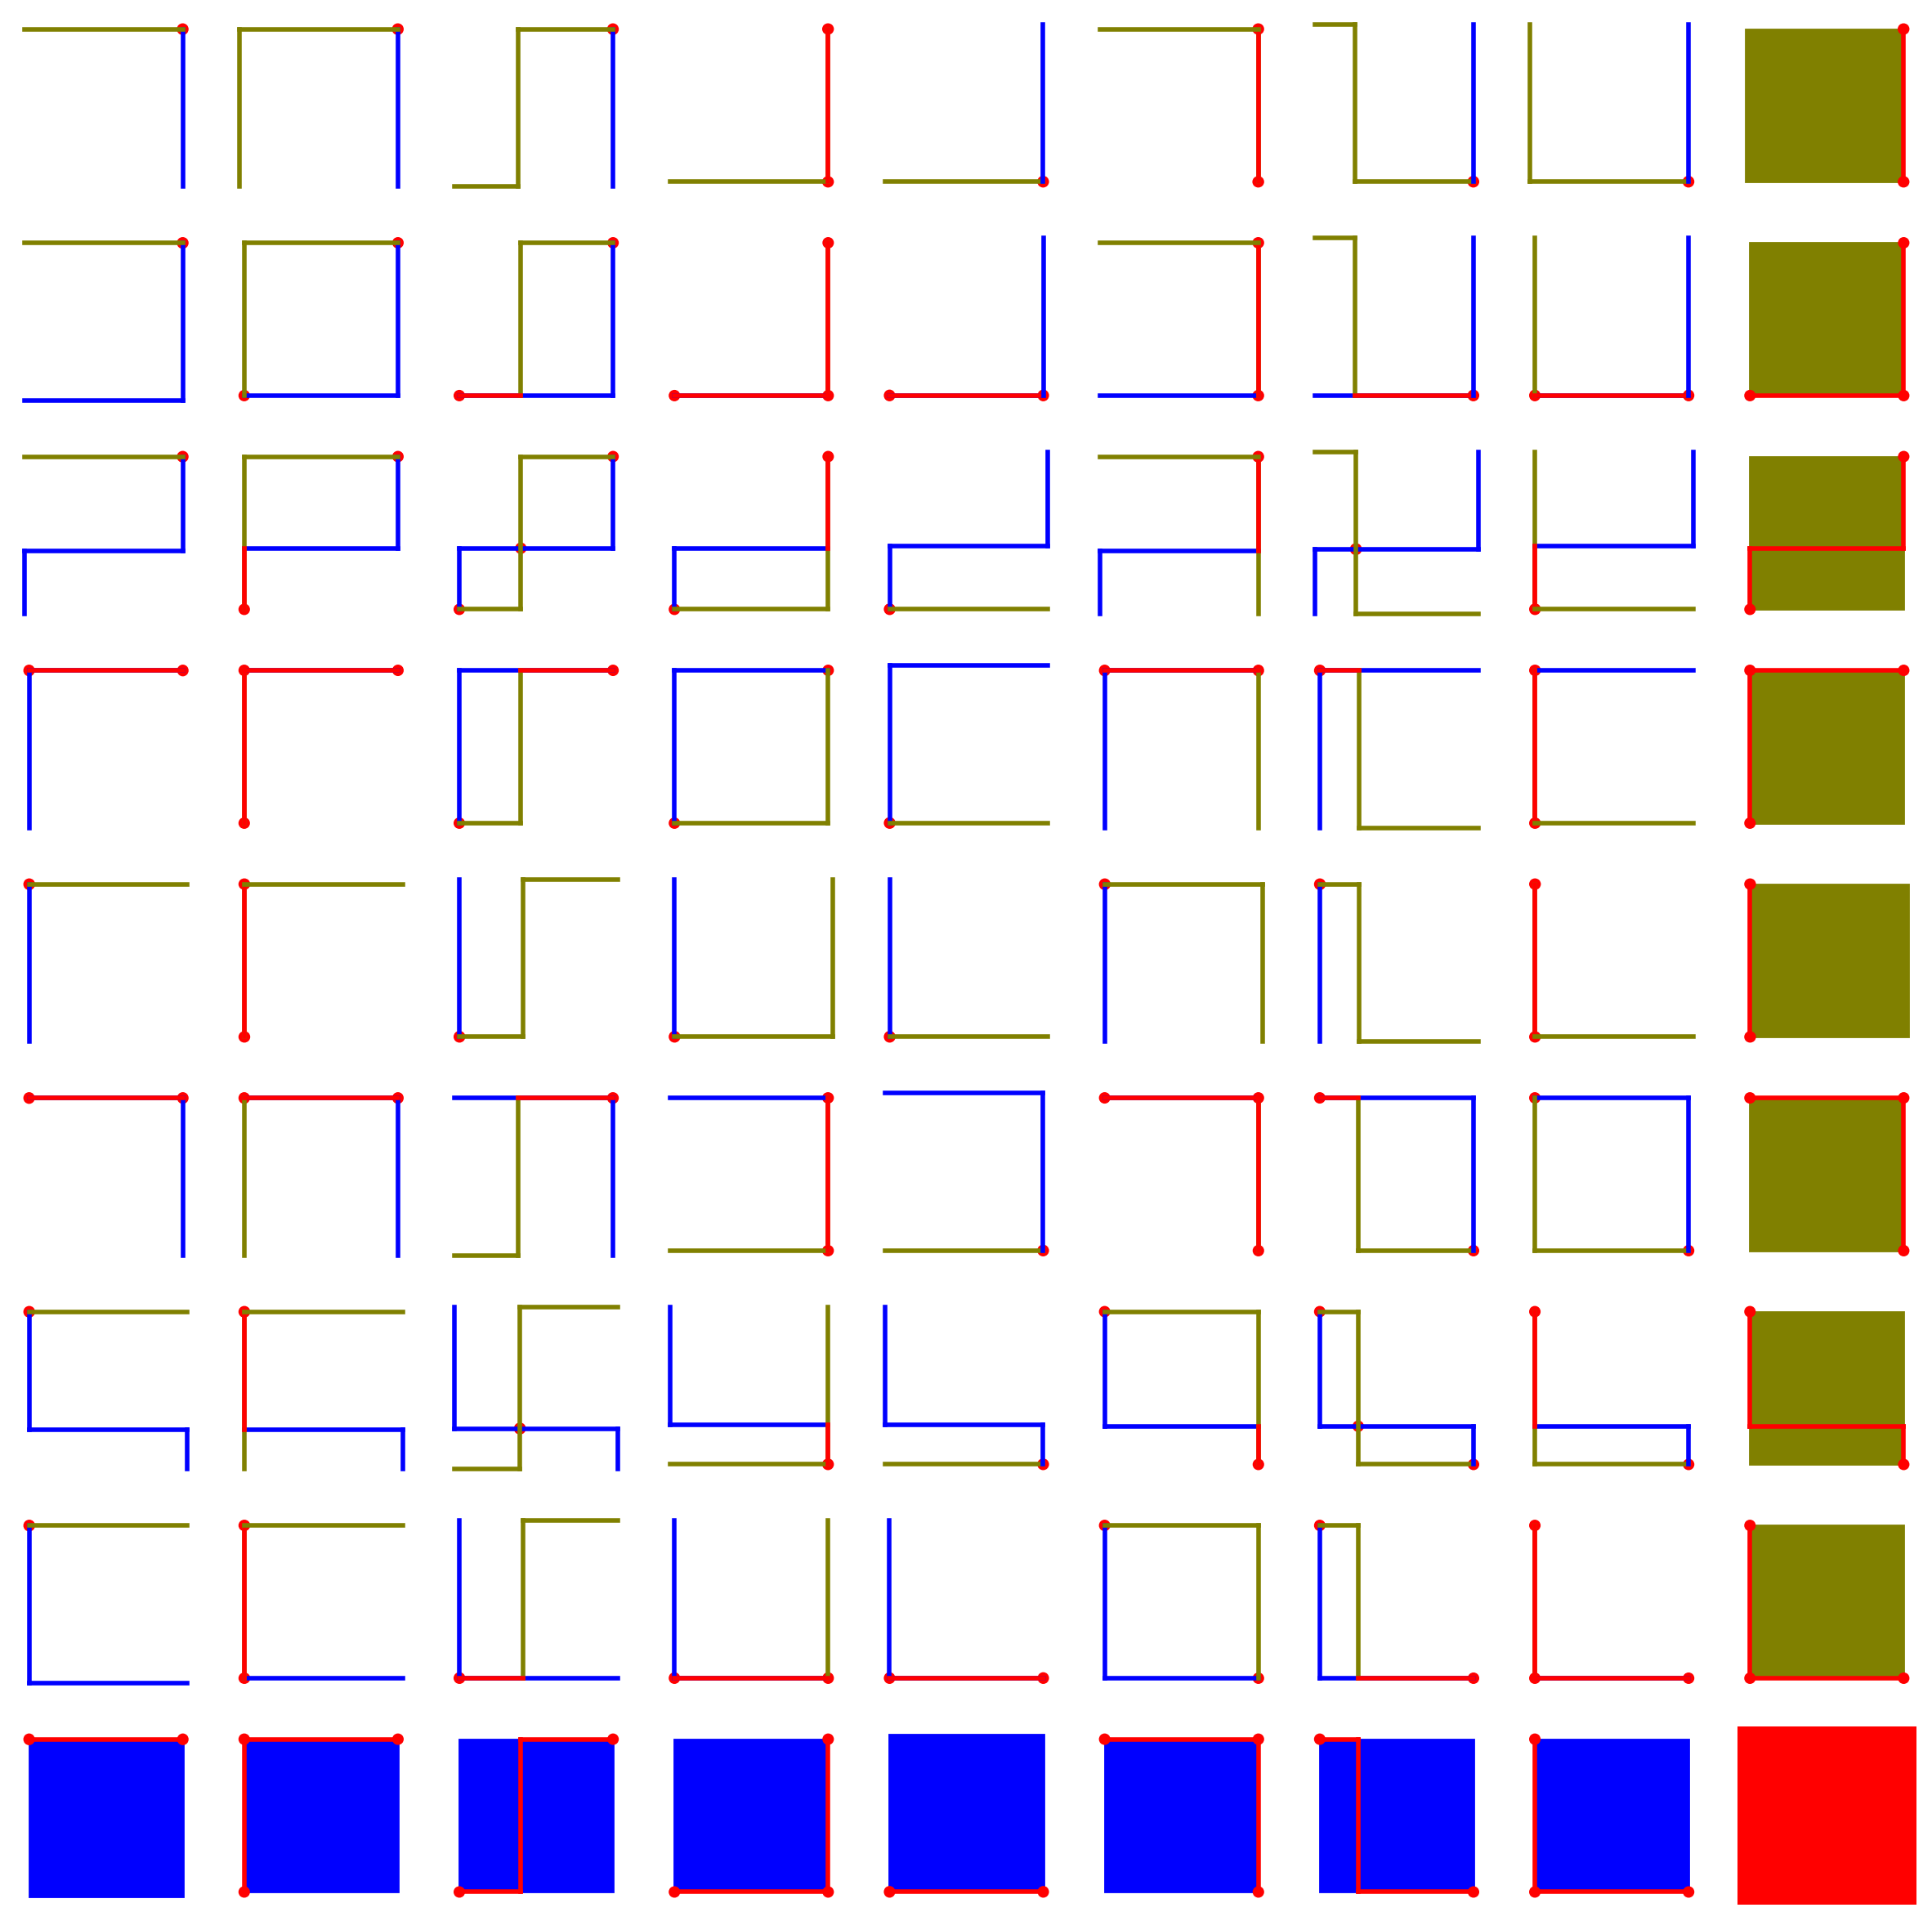

In [17]:
def draw_all_no_regret_graphs():
    colours = {'Ruth': 'blue', 'Charlie': 'olive', 'Nash': 'red'}
    plt.figure(figsize=(15, 15))
    i = 0
    for ruth_payoffs in ruth_payoffs_examples[: -2]:
        for charlie_payoffs in charlie_payoffs_examples[: -2]:
            i += 1
            plt.subplot(9, 9, i)
            plt.axis('off')
            all_good, segments, probas, expectations =\
                    analyse({'Ruth': ruth_payoffs, 'Charlie': charlie_payoffs})
            draw_rectangles(all_good, colours)
            draw_inner_lines(all_good, probas, colours)
            draw_outer_lines(all_good, segments, probas, colours)
            draw_intersecting_nash_equilibria(probas, expectations, colours)
            draw_pure_nash_equilibria(all_good, segments, probas, colours)
            
draw_all_no_regret_graphs();

The program `nash_equilibrium_calculator.py` creates a widget that expects the 4 pairs of payoffs, $(a_1,b_1)$, $(a_2,b_2)$, $(a_3,b_3)$ and $(a_4,b_4)$ to be entered in this form, all numbers being integers, with possibly spaces on either side of the parentheses and commas. To check input validity and extract the data, we take advantage of the syntax of regular expressions and make use of the `re` module and its `search()` function. This function tries and find a match between a pattern string and part of a data string, the pattern and the string being provided as first and second arguments, respectively. When the first argument can match many parts of the second argument, `search()` looks for the longest leftmost part. A character matches itself, while a dot matches any character:

In [18]:
re.search('cde', 'abcdef')
re.search('...', 'abcdef')
re.search('.c.', 'abcdef')

<re.Match object; span=(2, 5), match='cde'>

<re.Match object; span=(0, 3), match='abc'>

<re.Match object; span=(1, 4), match='bcd'>

`\d` matches any digit, while `\D` matches any nondigit:

In [19]:
re.search('\d\d', '_ab123')
re.search('\D\D', '_ab123')

<re.Match object; span=(3, 5), match='12'>

<re.Match object; span=(0, 2), match='_a'>

`\s` matches any space, while `\S` matches any nonspace character:

In [20]:
re.search('\s\s\s', ' a1? \t\n!')
re.search('\S\S\S', ' a1? \t\n!')

<re.Match object; span=(4, 7), match=' \t\n'>

<re.Match object; span=(1, 4), match='a1?'>

`\w` matches any character that can be part of a word (Python identifier), that is, a letter, the underscore or a digit, while `\W` matches any other character:

In [21]:
re.search('\w\w\w', ' |+a_2| ')
re.search('\W\W\W', ' |+a_2| ')

<re.Match object; span=(3, 6), match='a_2'>

<re.Match object; span=(0, 3), match=' |+'>

A question mark requests an optional occurrence of the pattern it applies to, which can be parenthesised to delimit its scope:

In [22]:
re.search('\d\s?\d', 'a12b')
re.search('\d\s?\d', 'a1 2b')
re.search('\s(\d\d)?\s', 'a 12 b')
re.search('\s(\d\d)?\s', 'a  b')

<re.Match object; span=(1, 3), match='12'>

<re.Match object; span=(1, 4), match='1 2'>

<re.Match object; span=(1, 5), match=' 12 '>

<re.Match object; span=(1, 3), match='  '>

A star requests an arbitrary (possibly empty) repetition of the pattern it applies to, which can be parenthesised to delimit its scope:

In [23]:
# The empty initial sequence is the longest leftmost substring of 'a123456b'
# consisting of digits
re.search('\d*', 'a123456b')
re.search('\d\d\d*', 'a123456b')
re.search('\d(\d\d)*', 'a123456b')

<re.Match object; span=(0, 0), match=''>

<re.Match object; span=(1, 7), match='123456'>

<re.Match object; span=(1, 6), match='12345'>

A plus requests an arbitrary nonempty repetition of the pattern it applies to, which can be parenthesised to delimit its scope:

In [24]:
re.search('.\d+', 'a123456b')
re.search('(.\d)+', 'a123456b')

<re.Match object; span=(0, 7), match='a123456'>

<re.Match object; span=(0, 6), match='a12345'>

Square brackets define character classes, surrounding the characters accepted for the match. In this context, any character with a special meaning (dot, question mark, star, plus, parenthesis...) loses its special meaning and is treated as a literal characters; to lose its special meaning outside a character class, such a character can be escaped:

In [25]:
re.search('[.]', 'abcabc.123456.defdef')
re.search('[cba]+', 'abcabc.123456.defdef')
re.search('.[\d]*', 'abcabc.123456.defdef')
re.search('\.[\d]*', 'abcabc.123456.defdef')
re.search('[.\d]+', 'abcabc.123456.defdef')

<re.Match object; span=(6, 7), match='.'>

<re.Match object; span=(0, 6), match='abcabc'>

<re.Match object; span=(0, 1), match='a'>

<re.Match object; span=(6, 13), match='.123456'>

<re.Match object; span=(6, 14), match='.123456.'>

Ranges of letters or digits can be provided within square brackets, letting a hyphen separate the first and last characters in the range. A hyphen placed after the opening square bracket or before the closing square bracket is interpreted as a literal character:

In [26]:
re.search('[e-h]+', 'ahgfea')
re.search('[B-D]+', 'ABCBDA')
re.search('[4-7]+', '154465571')
re.search('[-e-gb]+', 'a--bg--fbe--z')
re.search('[73-5-]+', '14-34-576')

<re.Match object; span=(1, 5), match='hgfe'>

<re.Match object; span=(1, 5), match='BCBD'>

<re.Match object; span=(1, 8), match='5446557'>

<re.Match object; span=(1, 12), match='--bg--fbe--'>

<re.Match object; span=(1, 8), match='4-34-57'>

Within a square bracket, a caret after placed after the opening square bracket excludes the characters that follow within the brackets:

In [27]:
re.search('[^4-60]+', '0172853')
re.search('[^-u-w]+', '-stv')

<re.Match object; span=(1, 5), match='1728'>

<re.Match object; span=(1, 3), match='st'>

A caret at the beginning of the pattern string matches the beginning of the data string; a dollar at the end of the pattern string matches the end of the data string:

In [28]:
re.search('\d*', 'abc')
re.search('^\d*', 'abc')
re.search('\d*$', 'abc')
# re.search('^\d*$', 'abc') returns no match
re.search('^\s*\d*\s*$', ' 345 ')

<re.Match object; span=(0, 0), match=''>

<re.Match object; span=(0, 0), match=''>

<re.Match object; span=(3, 3), match=''>

<re.Match object; span=(0, 5), match=' 345 '>

Escaping a dollar at the end of the pattern string, escaping a caret at the beginning of the pattern string or after the opening square bracket of a character class, makes dollar and caret lose the special meaning they have in those contexts context and let them be treated as literal characters:

In [29]:
re.search('\$', '$*')
re.search('\^', '*^')
re.search('[\^]', '^*')
re.search('[^^]', '^*')

<re.Match object; span=(0, 1), match='$'>

<re.Match object; span=(1, 2), match='^'>

<re.Match object; span=(0, 1), match='^'>

<re.Match object; span=(1, 2), match='*'>

Whereas square brackets surround alternative characters, a vertical bar separates alternative patterns:

In [30]:
re.search('two|three|four', 'one three two')
re.search('|two|three|four', 'one three two')
re.search('[1-3]+|[4-6]+', '01234567')
re.search('([1-3]|[4-6])+', '01234567')
re.search('_\d+|[a-z]+_', '_abc_def_234_')
re.search('_(\d+|[a-z]+)_', '_abc_def_234_')

<re.Match object; span=(4, 9), match='three'>

<re.Match object; span=(0, 0), match=''>

<re.Match object; span=(1, 4), match='123'>

<re.Match object; span=(1, 7), match='123456'>

<re.Match object; span=(1, 5), match='abc_'>

<re.Match object; span=(0, 5), match='_abc_'>

Parentheses allow matched parts to be saved. The object returned by `re.search()` has a `group()` method that without argument, returns the whole match and with arguments, returns partial matches; it also has a `groups()` method that returns all partial matches:

In [31]:
R = re.search('((\d+) ((\d+) \d+)) (\d+ (\d+))', '  1 23 456 78 9 0 ')

R
R.group()
R.groups()
[R.group(i) for i in range(len(R.groups()) + 1)]

<re.Match object; span=(2, 15), match='1 23 456 78 9'>

'1 23 456 78 9'

('1 23 456', '1', '23 456', '23', '78 9', '9')

['1 23 456 78 9', '1 23 456', '1', '23 456', '23', '78 9', '9']

Pairs of parentheses can therefore play two roles:

* surround patterns to which question marks, stars or pluses can be applied to;
* delimit the patterns to capture and save.

To let a pair of parentheses play the first role only, let `?:` follow the opening parenthesis:

In [32]:
# Separated by any sequence of characters, two strings of the form an
# optional + or -, followed by
# - either 0
# - or a nonzero digit followed with a (possibly empty) sequence of
#   digits
R = re.search('([+-]?(?:0|[1-9]\d*)).*([+-]?(?:0|[1-9]\d*))',
              ' a = -3014, b = 0 '
             )

R
R.groups()

<re.Match object; span=(5, 17), match='-3014, b = 0'>

('-3014', '0')

The following function checks that its argument is a string:

0. that from the beginning: `^`
1. consists of possibly some spaces: `␣*`
2. followed by an opening parenthesis: <code>\\&#40;</code>
3. possibly followed by spaces: `␣*`
4. possibly followed by either + or -: `[+-]?`
5. followed by either 0, or a nonzero digit followed by any sequence of digits: `0|[1-9]\d*`
6. possibly followed by spaces: `␣*`
7. followed by a comma: `,`
8. followed by characters matching the pattern described by 1-7
9. followed by a closing parenthesis: <code>\\&#41;</code>
10. possibly followed by some spaces: `␣*`
11. all the way to the end: `$`

Pairs of parentheses surround both numbers to match to capture them. For point 5, a surrounding pair of parentheses is needed; `?:` makes it non-capturing:

In [33]:
def validate_and_extract_payoffs(provided_input):
    pattern = '^ *\( *([+-]?(?:0|[1-9]\d*)) *, *([+-]?(?:0|[1-9]\d*)) *\) *$'
    match = re.search(pattern, provided_input)
    if match:
        return (match.groups())
    
validate_and_extract_payoffs('(+0, -7 )')
validate_and_extract_payoffs('  (-3014,0)  ')

('+0', '-7')

('-3014', '0')